In [1]:
pip install kaggle kagglehub


                                              0.0/82.7 kB ? eta -:--:--
     --------------                           30.7/82.7 kB ? eta -:--:--
     --------------                           30.7/82.7 kB ? eta -:--:--
     --------------                           30.7/82.7 kB ? eta -:--:--
     --------------                           30.7/82.7 kB ? eta -:--:--
     -------------------------------------- 82.7/82.7 kB 308.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/43.0 kB ? eta -:--:--
     ---------------------------------------- 43.0/43.0 kB 2.2 MB/s eta 0:00:00
                                              0.0/167.3 kB ? eta -:--:--
     --------------------------               112.6/167.3 kB ? eta -:--:--
     --------------------------               112.6/167.3 kB ? eta -:--:--
     --------------------------               112.6/167.3 kB ? eta -:--:--
    

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.


In [2]:
!pip install kaggle

In [8]:
!kaggle datasets list


ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset             10KB  2024-10-29 19:32:26           8786        161  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                        22KB  2024-11-11 19:11:28           4089         60  1.0              
jacopoferretti/incomes-of-30k-usa-citizens                    Incomes of 30K USA Citizens                     468KB  2024-11-17 00:16:20           1080         23  1.0              
valakhorasani/gym-members-exercise-dataset                    Gym Members Exercise Dataset

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 2.29G/2.29G [07:01<00:00, 5.84MB/s]

Extracting files...


Path to dataset files: C:\Users\abith\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt


In [14]:
dataset_path = r"C:\Users\abith\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2"

# Define paths for training, validation, and testing data
test_dir = r"C:\Users\abith\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2\chest_xray\test"
train_dir = r"C:\Users\abith\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2\chest_xray\train"
val_dir = r"C:\Users\abith\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2\chest_xray\val"


In [15]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\abith\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [18]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10


C:\Users\abith\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 512s 3s/step - accuracy: 0.8389 - loss: 0.3479 - val_accuracy: 0.8125 - val_loss: 0.3763
Epoch 2/10


C:\Users\abith\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.3763
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.9453 - loss: 0.1514 - val_accuracy: 0.8125 - val_loss: 0.3165
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.3165
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.9487 - loss: 0.1286 - val_accuracy: 0.7500 - val_loss: 0.3885
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3885
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 507s 3s/step - accuracy: 0.9513 - loss: 0.1244 - val_accuracy: 0.8750 - val_loss: 0.2392
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2392
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 513s 3s/step - accuracy: 0.9640 - lo

In [19]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.8839 - loss: 0.3283
Test Accuracy: 89.26%


In [20]:
model.save('pneumonia_detection_model.h5')


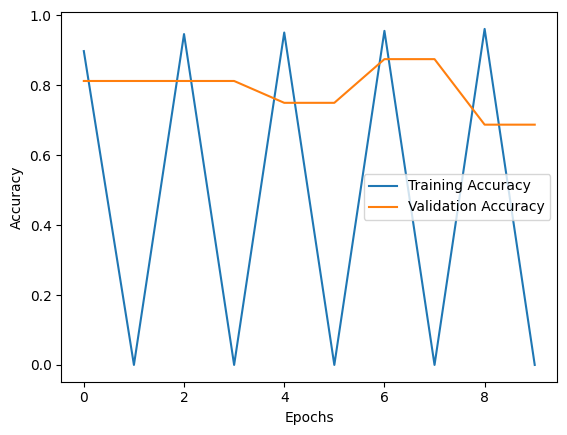

In [21]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess an image
img_path = r"C:\Users\abith\Downloads\OIP.jpeg" 
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
print("Prediction:", "Pneumonia" if prediction[0][0] > 0.5 else "Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Prediction: Pneumonia


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess an image
img_path = r"C:\Users\abith\Downloads\R.jpeg" 
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
print("Prediction:", "Pneumonia" if prediction[0][0] > 0.5 else "Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Prediction: Normal
